# Pandas exercise 2

In [1]:
import numpy as np
import pandas as pd

---

## 請讀入 train.csv 檔案

In [3]:
dat = pd.read_csv('train.csv')

In [4]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## 請問LotShape共有幾類

In [10]:
dat.LotShape.nunique()

4

---

## 請計算LotFrontage有幾筆遺漏值

In [6]:
dat.isna().sum().LotFrontage

259

---

## 請畫出房價的直方圖

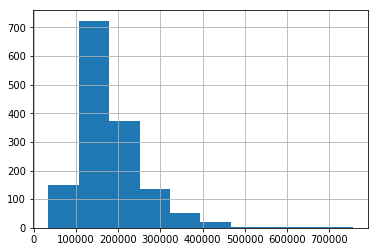

In [22]:
dat['SalePrice'].hist()

---

## 請計算房價(SalePrice)的95百分位數，並將房價高於此數值的資料篩選出來

In [7]:
dat.SalePrice.quantile(0.95)

326099.99999999994

In [9]:
dat[dat.SalePrice>dat.SalePrice.quantile(0.95)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402


---

## 請問算出資料中各月份賣出的房屋數並由大排到小

In [11]:
dat.MoSold.value_counts().sort_values(ascending = False)

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

---

## 請將MSSubClass的型態轉為字串

In [12]:
dat['MSSubClass'] = dat['MSSubClass'].astype('str')

---

## 請計算出各個MSSubClass下的平均房價(SalePrice)與LotArea最大值

In [13]:
dat.groupby('MSSubClass').agg({'SalePrice':'mean', 'LotArea':'max'})

,SalePrice,LotArea
MSSubClass,,
120,200779.080460,14963
160,138647.380952,10762
180,102300.000000,3675
190,129613.333333,164660
20,185224.811567,215245
30,95829.724638,25339
40,156125.000000,23595
45,108591.666667,10594
50,143302.972222,159000


---

## 請挑出2008年賣出的房屋並畫出其房價(SalePrice)與整體品質(OverallQual)的相關係數

In [15]:
dat[dat.YrSold==2008][['SalePrice','OverallQual']].corr()

,SalePrice,OverallQual
SalePrice,1.000000,0.765874
OverallQual,0.765874,1.000000


---

## 請以各LotShape組別下LotFrontage的平均值對LotFrontage補值**
    範例：若此筆遺漏值的LotShape為IR1，則以資料中LotShape==IR1房屋的LotFrontage平均補入

In [16]:
dat['LotFrontage'] = dat.groupby('LotShape')['LotFrontage'].apply(lambda x: x.fillna(x.mean()))

In [17]:
dat.groupby('LotShape')['LotFrontage'].mean()

LotShape
IR1     76.094637
IR2     76.500000
IR3    138.428571
Reg     67.038778
Name: LotFrontage, dtype: float64

---